# The Random Forest Algorithm

The random forest algorithm is a machine learning method that joins multiple decision tree instances to perform classification or regression. Such combinations are known as ensemble learning models. The term 'random forest' is derived from the inverted forest-like appearance of a multiple decision trees joined at the head.

Here we will demonstrate an implementation of both regression (making a prediction based on continuuous data - essentially fancy fitting) and classification (predicting labels of objects based on past experience). Both methods are types of supervised learning, where we train the algorithm on example data.

First we need to understand the basics - the decision tree.

## Decision Trees

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

We can think of a DT as a series of sequential yes/no questions like a flowchart. The final result of the tree is a class label (classification) or value (regression).
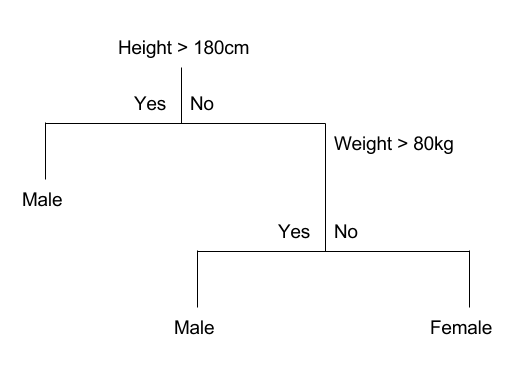
A decision tree model is trained and built by determing the questions that lead to the 'best result'. In pracise the best result is determined by the greatest reduction in the *Gini Impurity*.

## Simple example

We start with a very simple example - binary classification in 2D. Traditionally, we call the features X and the labels y

In [4]:
import numpy as np
import pandas as pd

# Set random seed to ensure reproducible runs
RSEED = 50

In [6]:
# 2D Array of Features
X = np.array([[2, 2], 
              [2, 1],
              [2, 3], 
              [1, 2], 
              [1, 1],
              [3, 3]])

# Labels each feature as belonging to one of two classes
y = np.array([0, 1, 1, 1, 0, 1])

Text(0.5,1,'Data')

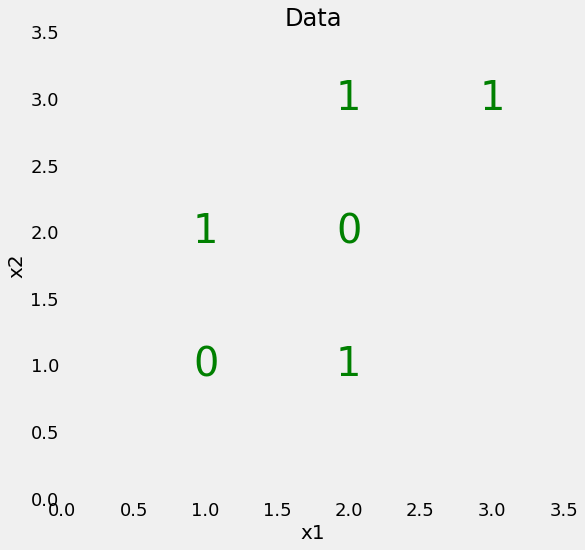

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.figure(figsize = (8, 8))

# Plot each point as the label
for x1, x2, label in zip(X[:, 0], X[:, 1], y):
    plt.text(x1, x2, str(label), fontsize = 40, color = 'g',
             ha='center', va='center')
    
# Plot formatting
plt.grid(None);
plt.xlim((0, 3.5));
plt.ylim((0, 3.5));
plt.xlabel('x1', size = 20); plt.ylabel('x2', size = 20); plt.title('Data', size = 24)

You can see from this plot the the two classes are not separable by a single straight line. This means that a simple linear classifier will not work. A decision tree works because it draws many boundaries between the points.

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
tree = DecisionTreeClassifier(random_state=RSEED)
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=50,
            splitter='best')

In [10]:
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 9 nodes with maximum depth 3.


In [11]:
print(f'Model Accuracy: {tree.score(X, y)}')

Model Accuracy: 1.0


Visualize Decision Tree
To get a sense of how the decision tree "thinks", it's helpful to visualize the entire structure. This will show each node in the tree which we can use to make new predictions. Because the tree is relatively small, we can understand the entire image.

First we export the tree as a dot file making sure to label the features and the classes.